In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('C:/Users/Khaled/Documents/CV Course/1/Computer-Vision-with-Python/DATA/reeses_puffs.png',0)

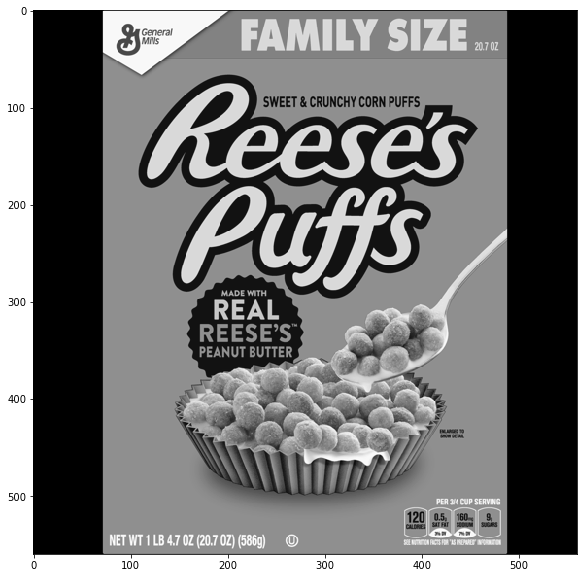

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('C:/Users/Khaled/Documents/CV Course/1/Computer-Vision-with-Python/DATA/many_cereals.jpg',0)

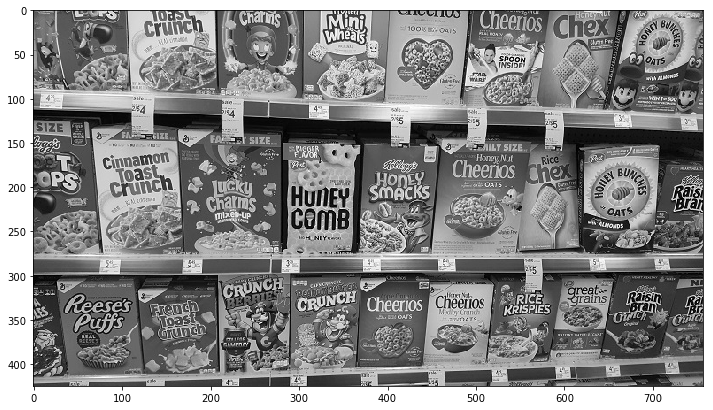

In [6]:
display(cereals)

In [7]:
# METHOD 1 (NOT VERY GOOD)
# BRUTE-FORCE MATCHING WITH ORB DESCRIPTORS:
orb = cv2.ORB_create()
# create a detector object that detects and computes features

In [8]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
# find keypoints and descriptors, detect and compute the description matches

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
# Brute-Force Matching with default parameters

In [10]:
matches = bf.match(des1,des2)
# check where matches occured

In [11]:
# matches
# match objects

In [12]:
single_match = matches[0]

In [14]:
single_match.distance

78.0

In [15]:
matches = sorted(matches,key=lambda x:x.distance)
# sort in order of distance, less distance --> better match... higher distnace --> worse match

In [18]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches,None,flags=2)
# draw the matches on an image

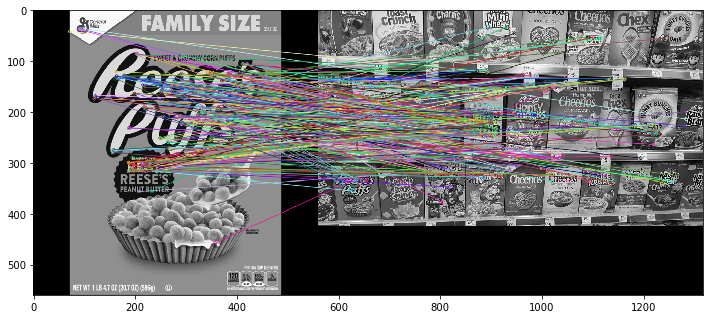

In [19]:
display(reeses_matches)

In [20]:
# METHOD 2 (GOOD)
# BRUTE-FORCE MATCHING WITH SIFT DESCRIPTORS AND RATIO TEST:
sift = cv2.xfeatures2d.SIFT_create()
# create sift detector object

In [21]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
# descriptor is an array of where it found features

In [25]:
bf = cv2.BFMatcher()
# compare matches by brute-force

In [26]:
matches = bf.knnMatch(des1,des2,k=2)
# use knn matcher to find the top 2 matches(selected from k)
# will display matches in pairs

In [27]:
good = []
# LESS DISTANCE = BETTER MATCH
# RATIO TEST < 75% MATCH 2
for match1,match2 in matches:
    # IF MATCH1 DISTANCE IS LESS THAN 75% OF MATCH2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, KEEP IT, ONLY THE 1ST
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [28]:
len(good)

78

In [29]:
len(matches)

1500

In [30]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
# draws the matches found on a new image

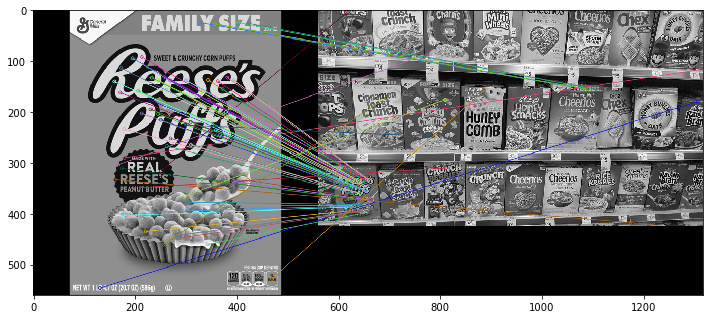

In [31]:
display(sift_matches)

In [49]:
#METHOD 3 (FASTER)
# FLANN BASED MATCHER
sift = cv2.xfeatures2d.SIFT_create()
# create a sift descriptor

In [50]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)
# descriptor is an array of where it found features

In [51]:
# FLANN
# DEFAULT PARAMETERS
FLANN_INDEX_KDTREE = 0 
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)
# create a dictionary

In [52]:
flann = cv2.FlannBasedMatcher(index_params,search_params)
# create a FLANN matcher

In [54]:
matches = flann.knnMatch(des1,des2,k=2)
# checks the matches in both images

In [57]:
matchesMask = [[0,0] for i in range(len(matches))]

In [58]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

In [61]:
draw_params = dict(matchColor=(0,255,0),singlePointColor=(255,0,0),matchesMask=matchesMask,flags=0)

In [62]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

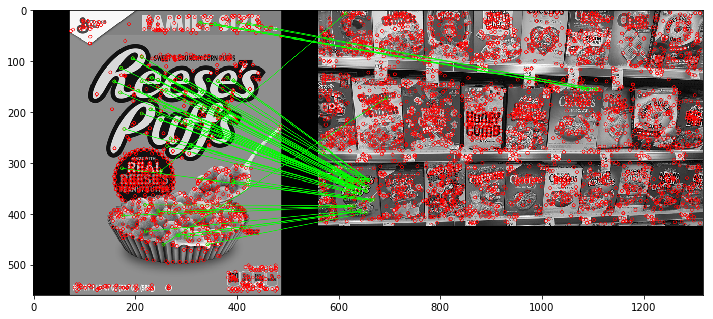

In [63]:
display(flann_matches)